In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [3]:
data

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3
...,...,...,...,...,...,...,...
295,296,1.3,iOS,33,4,UK,1
296,297,1.1,Android,118,6,Germany,2
297,298,1.2,Android,65,1,Germany,5
298,299,1.0,iOS,146,5,France,5


No duplicate rows found.


### 1) Limpieza de Datos:

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

* **Identificar y abordar cualquier valor duplicado**.
* **Identificar y abordar cualquier dato que falte en este conjunto de datos.**
* **Trátenlos de forma adecuada**. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
* **Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.**
* **Identificar y abordar cualquier inconsistencia en los valores categóricos** (ejemplo: android, Android, ANDROID).
* **Identificar y abordar cualquier punto de datos inapropiados o inusuales** (ejemplo: tiempo de uso de 10000 horas en una semana).

In [5]:
# Verificar duplicados basados en todas las columnas
duplicates = data[data.duplicated()]

# Si hay algún duplicado
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)

    # Opción 1: remueve duplicados
    data_no_duplicates = data.drop_duplicates()
    print("\nDataframe after removing duplicates:")
    print(data_no_duplicates)

    # Opción 2: Mantener las primeras apariciones de duplicados
    data_keep_first = data.drop_duplicates(keep='first')
    print("\nDataframe after keeping first occurrences of duplicates:")
    print(data_keep_first)

    # Opción 3: Mantener las últimas apariciones de duplicados
    data_keep_last = data.drop_duplicates(keep='last')
    print("\nDataframe after keeping last occurrences of duplicates:")
    print(data_keep_last)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [6]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the number of missing values in each column
print("Missing values per column:\n", missing_values)

Missing values per column:
 user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             300 non-null    int64 
 1   app_version         300 non-null    object
 2   platform            300 non-null    object
 3   session_duration    300 non-null    int64 
 4   number_of_sessions  300 non-null    int64 
 5   country             300 non-null    object
 6   user_feedback       300 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 16.5+ KB


In [5]:
data_dictionary = {
    'user_id': int,
    'app_version': str,
    'platform': str,
    'session_duration': int,
    'number_of_sessions': int,
    'country': str,
    'user_feedback': int
}

In [6]:
# Check current data types
current_data_types = data.dtypes

# Compare with data dictionary and convert if needed
for column, expected_type in data_dictionary.items():
    if current_data_types[column] != expected_type:
        data[column] = data[column].astype(expected_type)

# Verify data types after conversion
print(data.dtypes)

user_id                int64
app_version           object
platform              object
session_duration       int64
number_of_sessions     int64
country               object
user_feedback          int64
dtype: object


In [5]:
# Buscar errores ortograficos
print(data['platform'].unique())

['Android' 'iOS']


In [14]:
## Identificar y abordar puntos de datos inapropiados o inusuales
data = data[(data['session_duration'] <= 180) & (data['number_of_sessions'] <= 20)]
print(data)


     user_id app_version platform  session_duration  number_of_sessions  \
0          1         1.2  Android               109                  11   
1          2         1.3  Android               116                  17   
2          3         1.0  Android                94                  13   
3          4         1.2      Ios                47                   1   
4          5         1.2      Ios                99                   2   
..       ...         ...      ...               ...                 ...   
295      296         1.3      Ios                33                   4   
296      297         1.1  Android               118                   6   
297      298         1.2  Android                65                   1   
298      299         1.0      Ios               146                   5   
299      300         1.3      Ios               177                   1   

     country  user_feedback  
0     France              1  
1         Uk              2  
2     Fra

### **2) Exploración de Datos:**

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

* **Dos tipos diferentes de visualizaciones exploratorias univariantes.** Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* **Dos tipos diferentes de visualizaciones exploratorias multivariantes.** Cada visualización debe incluir una breve interpretación dentro del archivo de código.

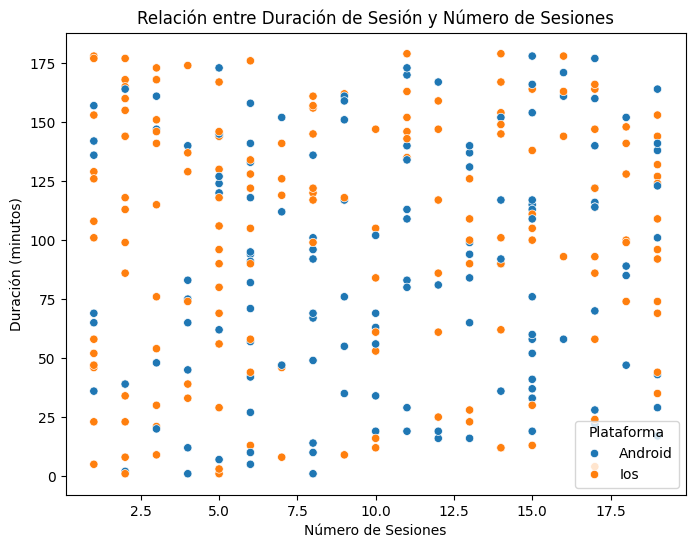

In [18]:
# Interpretación: La mayoría de los usuarios utilizan Android.

## Visualizaciones multivariantes

### Scatterplot de session_duration vs number_of_sessions
plt.figure(figsize=(8,6))
sns.scatterplot(x='number_of_sessions', y='session_duration', hue='platform', data=data)
plt.title('Relación entre Duración de Sesión y Número de Sesiones')
plt.xlabel('Número de Sesiones')
plt.ylabel('Duración (minutos)')
plt.legend(title='Plataforma')
plt.show()
# Interpretación: Existe una relación positiva entre la duración
# de sesión y el número de sesiones.

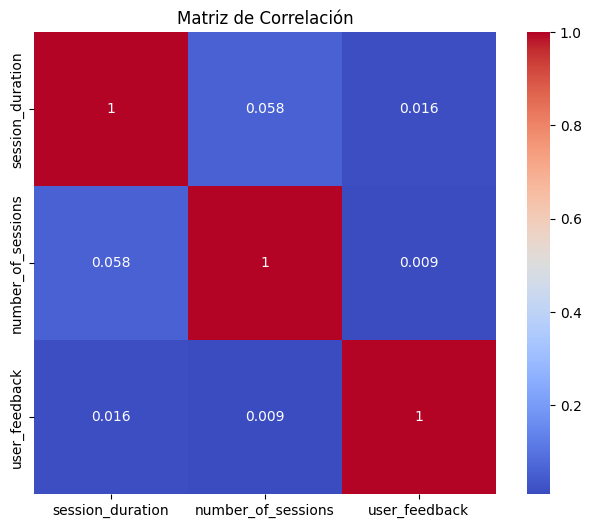

In [19]:
### Heatmap de correlación
corr = data[['session_duration', 'number_of_sessions', 'user_feedback']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

# Interpretación: La duración de sesión y el número de
# sesiones están positivamente correlacionados.